# 2. Labor: k-Means clustering algoritmus

A gépi tanulás algoritmusait **három fő csoportba** oszthatjuk:
- Felügyelt (Supervised) tanulás
- Felügyelet nélküli (Unsupervised) tanulás
- Megerősítéses (Reinforcement) tanulás

<!---
<center><img src="img/ML_branches.svg" width="700"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1Owko-EnvrmBJ1pIhUP7Kv5r_NEV9WVOk" width="700"></center>


A felügyelt tanulás esetén a bemeneti adathalmazunkhoz tartoznak kimeneti értékek. A tanulás során a célunk az, hogy a modell a már meglévő kimeneti adatokat a lehető legjobban visszaadja. A tanulás "felügyelt", mert megadjuk, milyen eredményt várunk.

A felügyelet nélküli tanulás esetében ez másképp van, itt nincsenek referencia kimenetek. Egy adott bemeneti adat halmazból szeretnénk, ha a tanulási módszer valamely módon kimeneti adatokat rendelne a bemenethez, azaz "felügyelet nélkül" kell a kimenet értékét behangolni. Felügyelet nélküli tanítást akkor alkalmazunk a gyakorlatban, ha egy adott adathalmazon kapcsolatokat, összefüggéseket szeretnénk azonosítani.

A harmadik csoport esetében nem bemeneti és kimenetei adatok között szeretnénk kapcsolatot teremteni, hanem egy olyan modellt (ágenst / ügynököt) létrehozni, ami egy adott környezetben a lehető legjobban teljesít. Az ügynök próbálkozásai során pozitív vagy negatív visszacsatolással (több / kevesebb pontot ért el) próbáljuk a legoptimálisabb viselkedésre, azaz a pontszám maximalizálására ösztökélni. A gépi tanulás ezen ága nem tárgya a jelen tárgynak.

**Előző alkalommal** egy **lineáris regresszió**s példát oldottunk meg gradiens módszer alkalmazásával. Mivel megadtuk, hogy a modellnek milyen kimeneti adatokat kell reprodukálnia, ez egy **felügyelt tanulás**i probléma volt, mégpedig annak regressziós altípusa. A mai laborgyakorlaton a **felügyelet nélküli tanulás** módszerei közül a **klasszikus k-közép algoritmus**t fogjuk implementálni.

### k-Means klaszterezési algoritmus

A k-Means klaszterezés az egy *iteratív módszer*, amely egyes adatokat az alapján sorolja klaszterekbe, hogy a melyik középponthoz, u.n. centroidhoz van a legközelebb. Az algoritmus a centroidok iteratív mozgatásától lesz tanuló algoritmus. Az algoritmus az alábbi lépésekből áll:
1. Kívánt klaszterek számának meghatározása
2. Megfelelő számú centroid inicializálása
3. Centroidok iteratív optimalizálása
    1. Az egyes adatpontokhoz a legközelebb eső centroid megtalálása
    2. Centroid új helyének meghatározása a klaszterbe sorolt adatpontok súlypontjaként
4. Iteráció ismétlése leállási kondícióig

A centroid és az adatpont közötti távolság alatt euklideszi tárvolságot értünk. Két dimenzió esetén:
$$ d = \sqrt{(x-x_c)^2+(y-y_c)^2} $$
Az összehasonlítás szempontjából a gyökvonás elhagyható és számolhatunk $d^2$-el is. Ahol a távoslágnégyzet kissebb, ott a tényleges távolság is kisseb lesz az adott centroidhoz.

A k-Means klaszterezés jóságát itt is költségfügvénnyel tudjuk leírni. A költésget ebben az esetben **inerciának** nevezzük, amely nem más, mint az egyes adatpontok megfelelő centroidtól vett távolságainak az összege.

### k-Means algoritmus problémái

#### Kezdeti centroidok megválasztása

A k-Means algoritmus érzékeny a kezdeti centroidok pozíciójára. Eltérő kezdeti helyzetek esetén az algoritmus előfordulhat, hogy más lokális minimumot ér el, amely adott esetben nem felel meg az általunk elvárt megoldásnak.

<!---
<center><img src="img/localOpt.svg" width="900"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1ZZ-4rKjWjgKaBICICmmSe7HG-CpcHn_F" width="900"></center>



#### Klaszterek számának megválasztása

A k-Means algoritmus előre megadott számú klasztert határoz meg, azok számának megválasztásához nem ad segítséget. A klaszterek számának megválasztása történhet:
- intuitív módon, adatfelfedezés után (szemre látszik, hogy x klaszter adott)
- könyök módszerrel

A könyök (elbow) módszer esetében az algoritmust több különböző klaszterszámmal lefuttatjuk, és megvizsgáljuk az elért költségfüggvény értékekét a klaszterek számának függvényében.

<!---
<center><img src="img/elbow.svg" width="900"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=1dfmoCMgAxx64IxWnTEKtYc9c5M51s0H0" width="900"></center>

Ahogy a jobb oldali ábrán is látszik, akadnak olyan esetek, amikor a könyök szabály nem alkalmazható, például, egy megközelítóleg lineáris eloszlású adathalmaz szeparálásánál. Ilyen esetre példa a ruhaméretek meghatározása. Itt csak a felhasználóra bízva, hogy milyen részleteséggel szeretné beosztani a skálát.

<!---
<center><img src="img/t-shirt_size.svg" width="900"></center>
-->
<center><img src="https://drive.google.com/uc?export=view&id=10mFIWqq327bJjHky0rNRuBl09WOHaGmf" width="900"></center>


## 00: Könyvtár importálások

Első lépésként importáljuk a feladat megoldása során használt könyvtárakat. Esetünkben ezek a következők lesznek:
- Numpy a matematikia műveletek elvégzéséhez
- Pandas az adatok beolvasásához és kezeléséhez
- MatPlotLib.pyplot az eredményeink ábrázolásához
- Plotly Express interaktív vizualizációhoz

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

# Használjuk ezeket sötét téma esetén
plt.style.use('dark_background')
styleTemplate = 'plotly_dark'

# Használjuk ezeket világos téma esetén
#plt.style.use('default')
#styleTemplate = 'plotly_white'

## 01: Adatbeolvasás

In [10]:
df = pd.read_csv('clusterData.txt', sep = ',', header=0)
df.head(10)

,X,Y
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
5,1.247923,4.932678
6,1.976199,4.434897
7,2.234541,5.055472
8,2.983408,4.840464
9,2.979704,4.806711


## 02: Adatfelfedezés

Új adthalmazzal történő első interrakció során érdemes azt először megvizsgálni, alapvető vizualizációkat ábrázolni, hogy legyen egy elsődleges "benyomás" az adatok jellegéről. Ábrázoljuk az adatokat egy X-Y diagrammon.

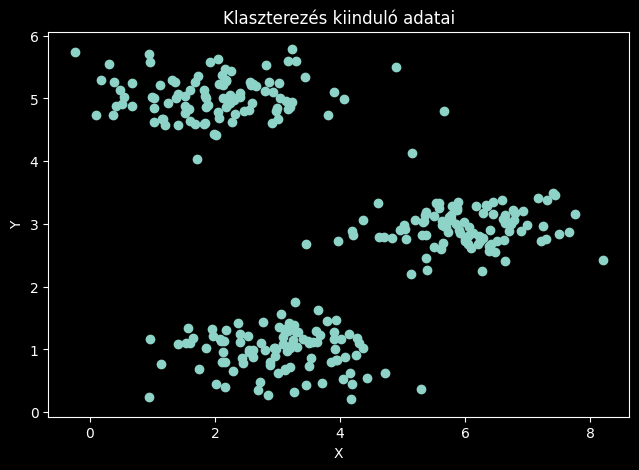

In [11]:
# Vizualizáció MatPlotLib-el
plt.figure(figsize=(7.5, 5))

plt.scatter(df['X'], df['Y'])

plt.title('Klaszterezés kiinduló adatai')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

Az ábrázolás alapján jól látható, hogy 3 darab klaszter található az adatsorban, így a későbbiekben ennyi centroiddal kell majd dolgoznunk.

## 03: Adatok előkészítése

A következő lépés az adatok eelőkészítése és a modellillesztés elvégzéshez szükséges változók létrehozása.

In [12]:
data = df[['X', 'Y']].to_numpy()    # Bemeneti változók oszlopainak kiemelése és tömmbé konvertálása
    
print('Data shape:', data.shape)    # adattömbök méretének / adatok számának kiírása

Data shape: (300, 2)


A kMeans algoritmus számára meg kell adnunk a klaszterekhez tartozó centroidok kiindulási pozícióit.

In [13]:
K = 3                                                           # klaszterszám
init_centroids = np.array([[3,3],[6,2],[8,5]])                  # kezdeti értékek a klaszterek középpontjához
print('Középpontok kezdeti értéke:\n',init_centroids)

Középpontok kezdeti értéke:
 [[3 3]
 [6 2]
 [8 5]]


Ábrázoljuk a centrodiok kiindulási helyeit is.

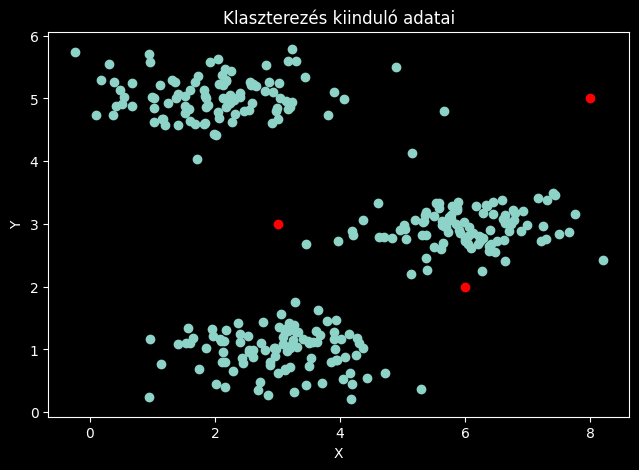

In [14]:
plt.figure(figsize=(7.5, 5))

plt.scatter(df['X'], df['Y'])
plt.scatter(init_centroids[:,0], init_centroids[:,1], c = 'red')

plt.title('Klaszterezés kiinduló adatai')
plt.xlabel('X')
plt.ylabel('Y')

plt.show()

## 04: Modell implementációja

A kMeans algoritmus két fő lépés iterálásból áll:
- a pontokhoz legközelebb eső centroid kiválasztása
- centroidok újraszámolása a hozzá tartozó pontok alapján

**Feladat:** implementálja az egyes pontokhoz tartozó klaszter indexét meghatározó metódust, illetve az adott centroidokhoz tartozó inerciát! Az idx változó egy olyan tömb legyen, amely minden adatpontra tartalmazza a hozzá legközelebb eső centroid indexét!

*Tipp:* a `np.argmin()` egy adott tömb adott dimenziója mentén visszatér a minimum érték indexével

In [15]:
def findClosestCentroids(data,centroids):    
    K = centroids.shape[0]
    dist=np.zeros([data.shape[0], K])
################################################    

    for i in range (data.shape):
        for j in range(K):
            dist[i,j]=np.sqrt((data[i,0]-centroids[j,0])**2+(data[i,1]-centroids[j,1])**2)


    idx = np.argmin(dist, axis = 1)
    inertia = np.sum(np.min(dist, axis = 0))

################################################    
    return idx, inertia

idx , inertia = findClosestCentroids(data, init_centroids)

print('Az első három adatponthoz tartozó klaszterek indexei (elvárt: 0-2-1):\n',idx[0:3])
print('Inercia a kiindulási centroidokra (elvárt: 571.9534944128595):\n',inertia)

if (init_centroids != [[3,3],[6,2],[8,5]]).any():
    print('A centroidok kiidnulási értékei nem jók!')
elif (idx[0:3] != [0, 2, 1]).any():
    print('A legközelebbi centroidot meghatározó algoritmus nem jó!')
elif (inertia != 571.9534944128595):
    print('Az inercia számítása nem megfelelő!')

Az első három adatponthoz tartozó klaszterek indexei (elvárt: 0-2-1):
 [0 2 1]
Inercia a kiindulási centroidokra (elvárt: 571.9534944128595):
 2.55312389882618
Az inercia számítása nem megfelelő!


**Feladat:** implementálja metódust, amely az adatok és a hozzájuk tartozó klaszter indexek alapján, kiszámítja az új centroidok értékeit!

*Tipp:* np tömböt egy bool változókat tartalmazó tömbbel indexelve 'maszkolni' tudunk:

    >>> a = np.array([True, False, True, False])
    >>> b = np.array([[1,2,], [3, 4], [5, 6], [7, 8]])
    >>> b[a,:]
    array([[1, 2],
           [5, 6]])

In [ ]:
def computeCentroids(data,idx,K):
    centroids = np.zeros((K,data.shape[1]))
################################################    
    for i in range(K):
        centroids[i,:] = np.mean(data[idx==i,:], axis = 0)

################################################    
    return centroids

centroids = computeCentroids(data,idx,K)
print("""Centroidok pozíciói egy iteráció után:
Várt értékek:
 [[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
Számított értékek:""")
print(centroids)

A klaszterezési eljárást futtathatjuk addig, amíg a centroidok pozícióiban már nem következik be változás, vagy az elegendően kicsi, vagy futtathatjuk maximum adott számú iterációig.

**Feladat**: implementálja a fentiekben adott metódusok használatával a k-Means algoritmust! Amennyiben az előző lépéshez képest nincs változás a centroidok pozíciójában, az iteráció álljon le akkor is, ha nem értük el a max iterációk számát!

In [ ]:
def kMeans(data, init_cents, max_iters):
    K = init_cents.shape[0]
    idx = np.zeros([data.shape[0]])
    centroids = init_cents
    cent_hist = np.zeros([init_cents.shape[0],init_cents.shape[1],max_iters+1])
    cent_hist[:,:,0] = init_cents
################################################  
    idx, inertia = findClosestCentroids(data,centroids)
    print("Kezdeti inercia: {0:.2f}".format(inertia))

    for i in range(max_iters):
        idx, inertia = findClosestCentroids(data,centroids)
        centroids=computeCentroids(data,idx,K)

        if (np.all(centroids == cent_hist[:,:,i])):
            cent_hist = cent_hist[:,:,:i+1]
            print("Az algoritmus konvergált")
            break

        cent_hist[:,:,i+1]=centroids
        idx, inertia = findClosestCentroids(data,centroids)
        print(" {0}/{1} iteráció. Inercia: {0:.2f}".format(i+1, max_iters,inertia))
    else:
        print("Az algoritmus elérte a maximális iterációszámot")

######## saját megoldás kezdemény
    '''exit=False
    i=1

    while ~exit:
        #klaszterezés (csoportba gyűjtés)
        (idx,inertia)
        
        #új középpont számítása
        cent_hist[:,:,i]=computeCentroids(data,idx,K)

        #kilépési feltételek
        if cent_hist[:,:,i]==cent_hist[:,:,i-1] | i==max_iters:
            exit=True
    
    i=i+1'''
    







################################################
    return centroids, idx, cent_hist

## 05: Model tanítás

A k-Means algoritmus futtatása 5 iterációval:

In [ ]:
max_iters = 5
init_cents = np.array([[3,3],[6,2],[8,5]])

centroids, idx, cent_hist = kMeans(data, init_cents, max_iters)

print()
print('Az elvárt inercia 5 iteráció után: 239.41')
print()
print("""Centroidok 5 iteráció után:
Elvárt:
 [[1.95399466 5.02557006]
 [3.12663743 1.1121712 ]
 [6.12919526 3.01606258]]
Számított:
""",centroids)

A k-Means algoritmus futtatása 10 iterációval:

In [ ]:
max_iters = 10
init_cents = np.array([[3,3],[6,2],[8,5]])

centroids, idx, cent_hist = kMeans(data, init_cents, max_iters)
print()
print('Az konvergenciáig elvárt iterációk száma: 6')
print('Az elvárt inercia konvergencia után: 238.25')
print()
print("""Centroidok konvergencia után:
Elvárt:
 [[1.95399466 5.02557006]
 [3.04367119 1.01541041]
 [6.03366736 3.00052511]]
Számított:
""",centroids)

## 06: Modell értékelése

A tanulási folyamat értkeléséhez rekreáljuk az egyes iterációkhoz tartozó kalszterindexeket és inerciát.

In [ ]:
iter = cent_hist.shape[2]
inertia_hist = np.zeros([iter])
idx_hist = np.zeros([data.shape[0], iter])
for i in range(iter):
    idx_hist[:,i], inertia_hist[i] = findClosestCentroids(data, cent_hist[:,:,i])

Ábrázoljuk az inercia értékének változását az iterációk során!

In [ ]:
plt.plot(range(iter), inertia_hist)                                         # Inercia history kirajzolása
plt.title("kMeans algoritmus inerciája az iterációkon keresztül",pad= 20)
plt.xlabel("Iteráció")
plt.ylabel("Inercia")
plt.show()

Ábrázoljuk a centroidok mozgását az iterációk során!

In [ ]:
# Adatok összerendezése a folyamat animáláshoz

df_animate = pd.DataFrame(columns=['X', 'Y', 'iter', 'idx'])
for iter in range(cent_hist.shape[2]):
    df_data = pd.DataFrame(data, columns= ['X', 'Y'])
    df_data['iter'] = iter
    df_data['idx'] = idx_hist[:,iter]

    df_centroid = pd.DataFrame(cent_hist[:,:,iter], columns= ['X', 'Y'])
    df_centroid['iter'] = iter
    df_centroid['idx'] = cent_hist.shape[0]

    df_animate = pd.concat([df_animate, df_data, df_centroid], axis = 0, ignore_index= True)

In [ ]:
fig = px.scatter(data_frame = df_animate, x='X', y='Y', animation_frame='iter', color='idx', hover_name='idx',
                 color_continuous_scale=["red", "green", "blue", "goldenrod"])

fig.update_layout(
    title = "k-Means algoritmus",
    xaxis_title = 'X',
    yaxis_title = "Y",
    template=styleTemplate,
    coloraxis_showscale=False,
    width=750,
    height=500) 

fig.layout.updatemenus[0].buttons[0].args[1]['frame']['duration'] = 1000
fig.layout.updatemenus[0].buttons[0].args[1]['transition']['duration'] = 300

fig.show()

## 07: Példa - képtömörítés k-Mean klaszterezéssel

A következő példában egy kép színeinek k-Means algoritmus segítségével történő kiválasztása és ezzel tömörítése látható. A példa teljes mértékben játékpélda, a valóságban sokkal jobb algoritmusok létezenek erre a feladatra.

C:\Users\nyuli\AppData\Local\Temp\ipykernel_4168\2541352198.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = np.asarray(imageio.imread('bird_small.jpg'))/255


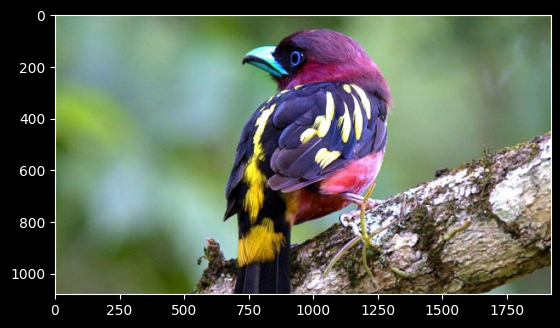

In [17]:
import imageio
img = np.asarray(imageio.imread('bird_small.jpg'))/255

plt.imshow(img)

In [ ]:
def kMeansInitCentroids(X,K):
    cents = np.zeros((K,X.shape[1]))
    randindx = np.random.permutation(X.shape[0])
    cents = X[randindx[0:K],:]
    
    return cents

In [ ]:
dataImg = img.reshape((int(img.size/3),3))

max_iters = 20
K = 3

init_cents = kMeansInitCentroids(dataImg,K)
print('Kezdeti centroidok:\n',init_cents)
centroids, idx, cent_hist = kMeans(dataImg, init_cents, max_iters)
print('K-Means clustering done...')

In [ ]:
img_recovered = centroids[idx.astype(int),:]
img_recovered = np.reshape(img_recovered, (img.shape[0], img.shape[1], img.shape[2]))
plt.imshow(img_recovered)

## XX: Megoldás a Scikit Learn könyvtár segítségével

Természetesen a k-Means algoritmust is megtalálhatjuk a megfelelő könyvtárban már implementált algoritmusként. Ez a metódus a szimpla k-Means-en felül több optimalizálást is tartalmaz. Részletek: <https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans>

In [ ]:
from sklearn.cluster import KMeans

df = pd.read_csv('clusterData.txt', sep = ',', header=0)                # adatok beolvasása

kMeans = KMeans(n_clusters = 3)                                         # centroidok inicilaizálása automatikus
kMeans.fit(df[['X' ,'Y']])                                              # modell illesztése X,Y alapján

print('Scikit-learn KMeans által számítiott centroidok:')               # számított centroidok
print(kMeans.cluster_centers_)

Klaszterezés eredményének ábrázolása:

In [ ]:
fig = px.scatter(data_frame = df, x='X', y='Y',                          # Eredmények ábrázolása
                         color=kMeans.labels_,
                         color_continuous_scale=["red", "green", "blue"])

fig.add_scatter(x=kMeans.cluster_centers_[:,0],                  # Centroidok
                y=kMeans.cluster_centers_[:,1],                          
                marker_color = 'goldenrod',
                line_width = 0)  

fig.update_layout(                                                      # Plot formázása
    title = "Scikit-learn KMeans algoritmus",
    xaxis_title = 'X',
    yaxis_title = 'Y',
    template=styleTemplate,
    coloraxis_showscale = False,
    showlegend = False,
    width=750,
    height=500,
)

fig.show()